В цьому домашньому завданні кожне завдання оцінюється по 10 балів.

 **Завдання 1.** Після перегляду лекцій про поняття функії, вступ до лінійної алгебри і мат. формулювання лін. регресії знайдіть найкращу лінію для прогнозу `charges` за `age` **для некурців** (датафрейм `non_smoker_df`) з допомогою

1. Методу МНК (з використанням тільки `numpy`, без `scikit learn`)

2. Full-Batch градієнтного спуску з `numpy` . Протестуйте 3 різних learning rate і зробіть висновок, який є найкращим виходячи з практик для цього, наведених в лекції. Зверніть увагу, що на вхід треба набір даних дворозміний, для цього можливо треба буде трансформувати Ваші дані X в формат, як був в лекції "Математичне формулювання лінійної регресії". Також, градієнтний спуск в нашому випадку може розходитись з навчальним рейтом 0.1, бо цей рейт в цій задачі завеликий. Спробуйте нижчі рейти.
3. З `scikit-learn.LinearRegression`. Тут зверніть увагу, що вхід `X` має бути двовимірним масивом, тому нам потрібно передати dataframe, а не окрему колонку. Якщо у Вас X - колонка (а у Вас так мало б бути), то можна скористатись `X.to_frame()` щоб конвертувати колонку в датафрейм.

Для кожного методу
- знайдіть і виведіть коефіцієнти моделі
- обчисліть прогнози моделі і збережіть в окрему змінну
- порахуйте точність прогнозу RMSE  

Для градієнтного спуску виведіть графік помилки в залежності від ітерації.

А також побудуйте на одному графіку дані `age` проти `charges` в вигляді діаграми розсіювання і всі чотири лінії регресії, знайдені кожним з методів (для град. спуску оберіть варіант з тим learning rate, який виявився найкращим).

Зробіть висновки, чи відрізняються результати моделей?
Чи є знайдены параметри моделы близькими до ваших найкращих припущень?

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
medical_df = pd.read_csv('/content/drive/MyDrive/ML course/data/medical-charges.csv') # замініть на ваш шлях до файлу
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [3]:
import numpy as np
import matplotlib.pyplot as plt


In [4]:
non_smoker_df

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


**Метод найменших квадратів**

In [5]:
def normal_equations(X,y):
    """Computes the closed-form solution to linear regression"""
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

In [6]:
X = non_smoker_df['age']

In [7]:
y = non_smoker_df['charges']

In [8]:
X_with_intercept = np.c_[np.ones((X.shape[0], 1)), X]
X[:3], X_with_intercept[:3]

(1    18
 2    28
 3    33
 Name: age, dtype: int64,
 array([[ 1., 18.],
        [ 1., 28.],
        [ 1., 33.]]))

In [9]:
MNK_coefs = normal_equations(X_with_intercept, y)
MNK_coefs

array([-2091.42055657,   267.24891283])

In [10]:
predictions_MNK = np.dot(X_with_intercept, MNK_coefs)
predictions_MNK[:3], y[:3]

(array([2719.0598744 , 5391.54900271, 6727.79356686]),
 1     1725.55230
 2     4449.46200
 3    21984.47061
 Name: charges, dtype: float64)

In [11]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [12]:
loss_MNK = rmse(y, predictions_MNK)
print('RMSE Loss MNK:', loss_MNK)

RMSE Loss MNK: 4662.505766636395


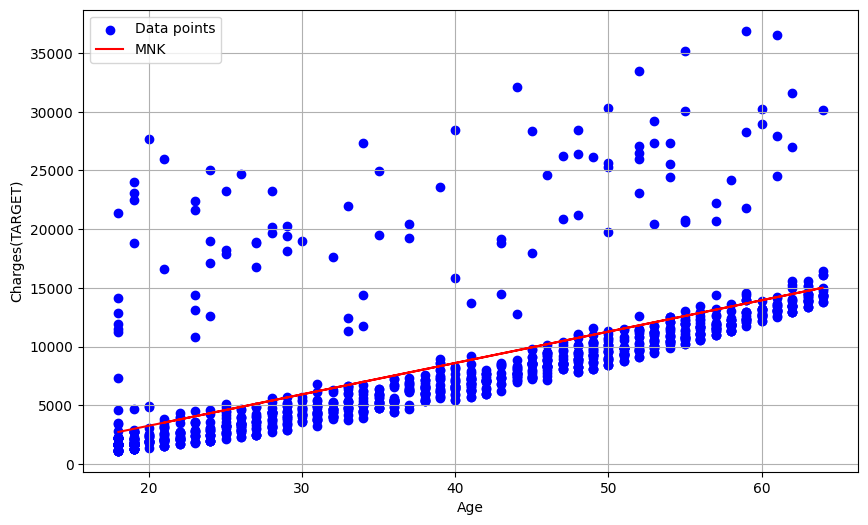

Coefs MNK: [-2091.42055657   267.24891283]
Predictions MNK: [2719.0598744  5391.54900271 6727.79356686 ... 2719.0598744  2719.0598744
 3520.80661289]
RMSE Loss MNK: 4662.505766636395


In [13]:
# Візуалізація результатів
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, predictions_MNK, color='red', label='MNK')
plt.xlabel('Age')
plt.ylabel('Charges(TARGET)')
plt.legend()
plt.grid(True)
plt.show()

print('Coefs MNK:', MNK_coefs)
print('Predictions MNK:', predictions_MNK)
print('RMSE Loss MNK:', loss_MNK)

Full-Batch градієнтного спуску з numpy . Протестуйте 3 різних learning rate і зробіть висновок, який є найкращим виходячи з практик для цього, наведених в лекції. Зверніть увагу, що на вхід треба набір даних дворозміний, для цього можливо треба буде трансформувати Ваші дані X в формат, як був в лекції "Математичне формулювання лінійної регресії". Також, градієнтний спуск в нашому випадку може розходитись з навчальним рейтом 0.1, бо цей рейт в цій задачі завеликий. Спробуйте нижчі рейти.

In [14]:
X_gd = np.expand_dims(X.to_numpy(),axis=1)
X_gd

array([[18],
       [28],
       [33],
       ...,
       [18],
       [18],
       [21]])

In [15]:
X_f = X.to_frame()
X_f

,age
1,18
2,28
3,33
4,32
5,31
...,...
1332,52
1333,50
1334,18
1335,18


In [33]:
# Градієнтний спуск
def full_batch_gradient_descent(X, y, lr=0.01, epochs=200):
    m, b = 0.0, 0.0  # Початкові параметри
    n = len(y)
    errors = []
    for _ in range(epochs):
        y_pred = m * X_gd[:, 0] + b
        error = y_pred - y
        errors.append(sum(error**2))
        m_gradient = (2/n) * np.dot(error, X_gd[:, 0])
        b_gradient = (2/n) * np.sum(error)
        m = m - lr * m_gradient
        b = b - lr * b_gradient
    return m, b, errors

m, b, errors = full_batch_gradient_descent(X_gd, y, lr=0.0001, epochs=200)
predictions_fbgd1 = m * X_gd[:, 0] + b

m, b

(220.26107384763154, -4.517864430930102)

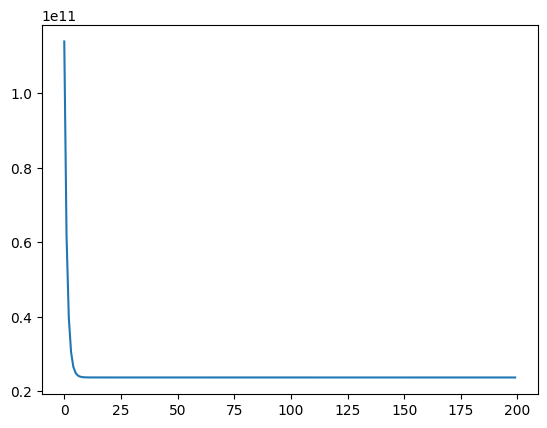

In [34]:
plt.plot(errors)

In [35]:
loss_FBGD1 = rmse(y, predictions_fbgd1)
print('RMSE Loss FBGD:', loss_FBGD1)

RMSE Loss FBGD: 4715.112306681941


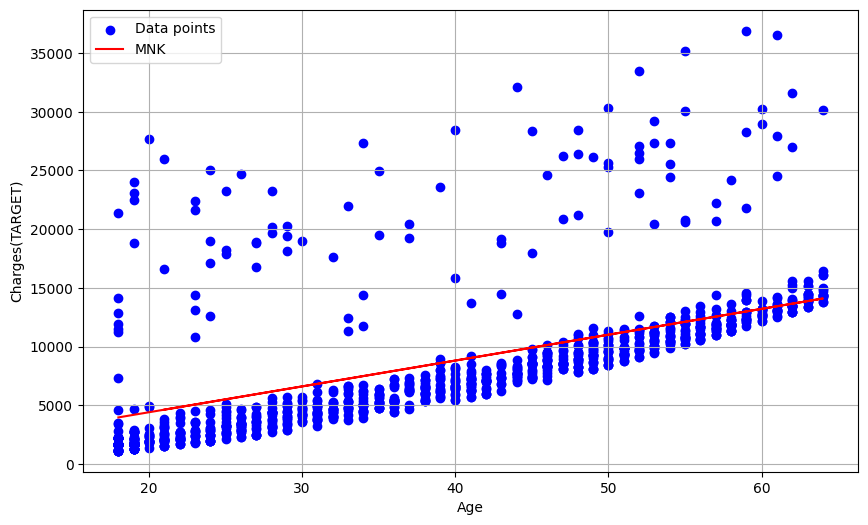

Coefs FBGD: 220.26107384763154 -4.517864430930102
Predictions FBGD: [3960.18146483 6162.7922033  7264.09757254 ... 3960.18146483 3960.18146483
 4620.96468637]
RMSE Loss FBGD: 4715.112306681941


In [36]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, predictions_fbgd1, color='red', label='MNK')
plt.xlabel('Age')
plt.ylabel('Charges(TARGET)')
plt.legend()
plt.grid(True)
plt.show()

print('Coefs FBGD:', m, b)
print('Predictions FBGD:', predictions_fbgd1)
print('RMSE Loss FBGD:', loss_FBGD1)

In [37]:
def full_batch_gradient_descent(X, y, lr=0.001, epochs=500):
    m, b = 0.0, 0.0  # Початкові параметри
    n = len(y)
    errors = []
    for _ in range(epochs):
        y_pred = m * X_gd[:, 0] + b
        error = y_pred - y
        errors.append(sum(error**2))
        m_gradient = (2/n) * np.dot(error, X_gd[:, 0])
        b_gradient = (2/n) * np.sum(error)
        m = m - lr * m_gradient
        b = b - lr * b_gradient
    return m, b, errors

m, b, errors = full_batch_gradient_descent(X_gd, y, lr=0.00005, epochs=200)
predictions_fbgd2 = m * X_gd[:, 0] + b

m, b

(220.15455599421477, 0.21298507959065488)

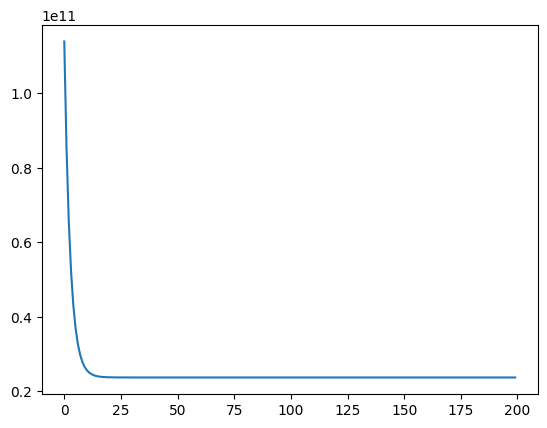

In [38]:
plt.plot(errors)

In [39]:
loss_FBGD2 = rmse(y, predictions_fbgd2)
print('RMSE Loss FBGD2:', loss_FBGD2)

RMSE Loss FBGD2: 4715.349749050136


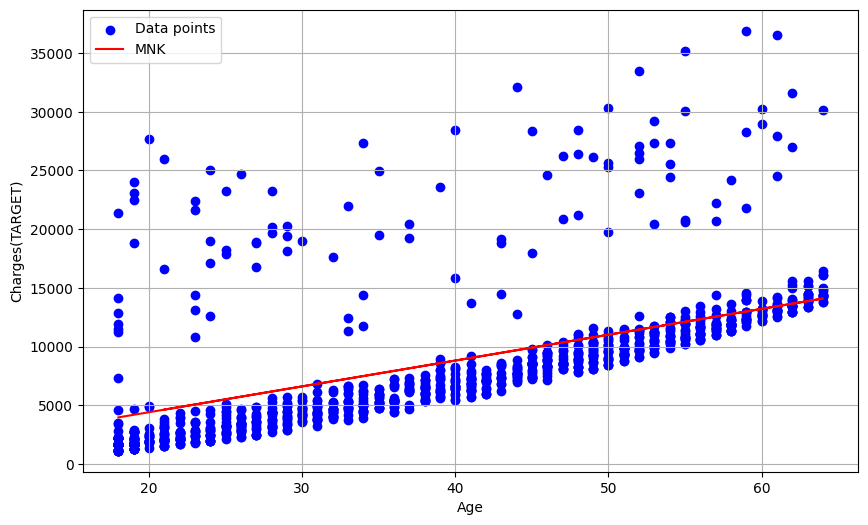

Coefs FBGD2: 220.15455599421477 0.21298507959065488
Predictions FBGD2: [3962.99499298 6164.54055292 7265.31333289 ... 3962.99499298 3962.99499298
 4623.45866096]
RMSE Loss FBGD2: 4715.349749050136


In [40]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, predictions_fbgd2, color='red', label='MNK')
plt.xlabel('Age')
plt.ylabel('Charges(TARGET)')
plt.legend()
plt.grid(True)
plt.show()

print('Coefs FBGD2:', m, b)
print('Predictions FBGD2:', predictions_fbgd2)
print('RMSE Loss FBGD2:', loss_FBGD2)

In [357]:
def full_batch_gradient_descent(X, y, lr=0.001, epochs=200):
    m, b = 0.0, 0.0  # Початкові параметри
    n = len(y)
    errors = []
    for _ in range(epochs):
        y_pred = m * X_gd[:, 0] + b
        error = y_pred - y
        errors.append(sum(error**2))
        m_gradient = (2/n) * np.dot(error, X_gd[:, 0])
        b_gradient = (2/n) * np.sum(error)
        m = m - lr * m_gradient
        b = b - lr * b_gradient
    return m, b, errors

m, b, errors = full_batch_gradient_descent(X_gd, y, lr=0.00003, epochs=50)
predictions_fbgd3 = m * X_gd[:, 0] + b

m, b

(219.20618066734943, 4.223283862753617)

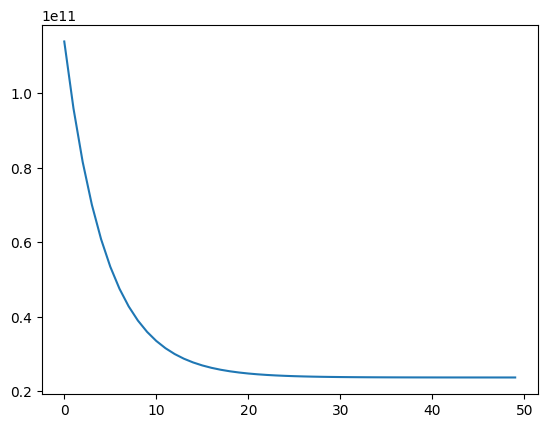

In [358]:
plt.plot(errors)

In [359]:
loss_FBGD3 = rmse(y, predictions_fbgd3)
print('RMSE Loss FBGD3:', loss_FBGD3)

RMSE Loss FBGD3: 4715.688984316647


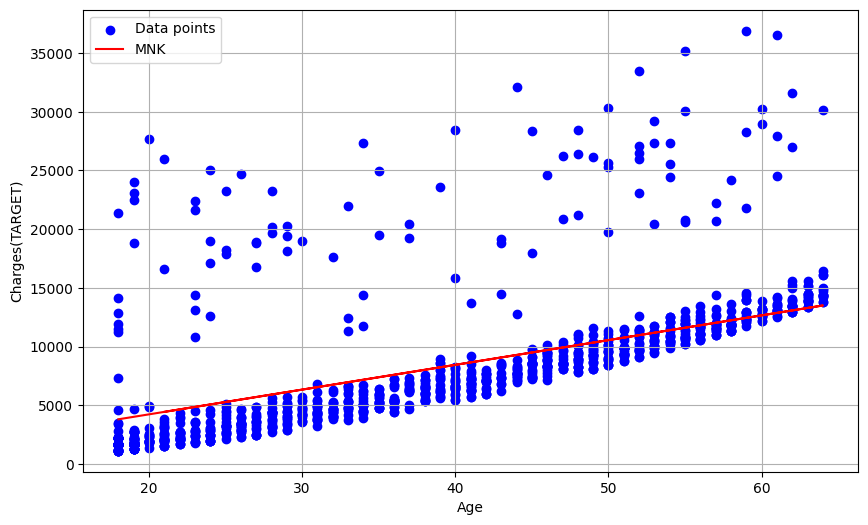

Coefs FBGD3: 210.86552219148345 4.320370026799431
Predictions FBGD3: [3799.89976947 5908.55499139 6962.88260235 ... 3799.89976947 3799.89976947
 4432.49633605]
RMSE Loss FBGD3: 4731.2286690704295


In [309]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, predictions_fbgd3, color='red', label='MNK')
plt.xlabel('Age')
plt.ylabel('Charges(TARGET)')
plt.legend()
plt.grid(True)
plt.show()

print('Coefs FBGD3:', m, b)
print('Predictions FBGD3:', predictions_fbgd3)
print('RMSE Loss FBGD3:', loss_FBGD3)

In [28]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()


In [29]:
lin_reg.fit(X_f, y)

LinearRegression()

In [30]:
lin_reg.coef_, lin_reg.intercept_

(array([267.24891283]), -2091.4205565650864)

In [31]:
predictions_sklearn = lin_reg.predict(X_f)

In [32]:
predictions_sklearn

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [363]:
loss_sklearn = rmse(y, predictions_sklearn)
print('RMSE Loss sklearn:', loss_sklearn)

RMSE Loss sklearn: 4662.505766636395


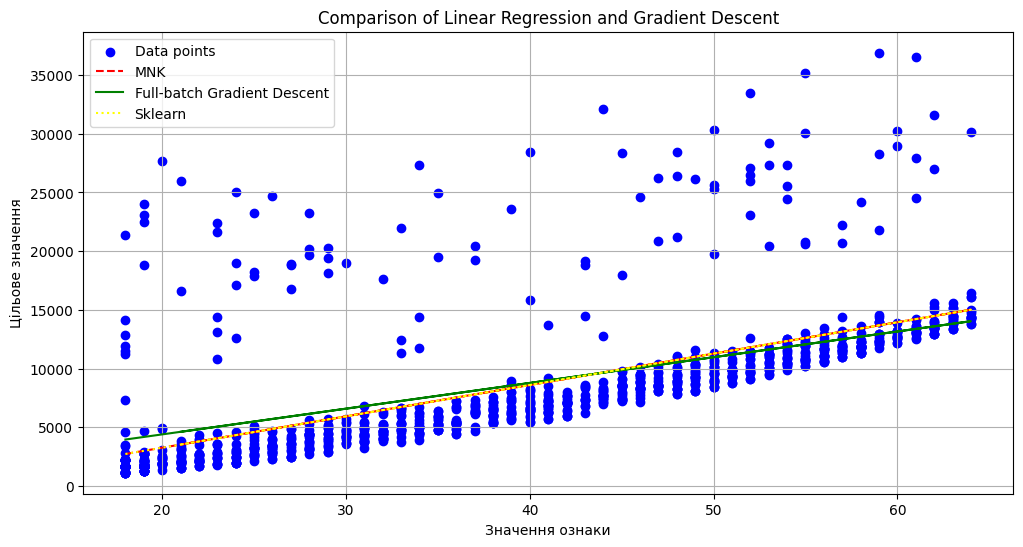

In [407]:
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, predictions_MNK, color='red', label='MNK', ls='--')
plt.plot(X_gd, predictions_fbgd3, color='green', label='Full-batch Gradient Descent')
plt.plot(X_f, predictions_sklearn, color='yellow', label='Sklearn', ls=':')
plt.title('Comparison of Linear Regression and Gradient Descent')
plt.xlabel('Значення ознаки')
plt.ylabel('Цільове значення')
plt.legend()
plt.grid(True)
plt.show()

На графіку видно тільки 2 лінії, оскільки МНК та Sklearn наклались один на другий і дали однаковий результат, про що і свідчить однаковий RMSE=4662 за цими двома методами. Метод градієнтного спуску дав гірший результат(найменше вдалось досягнути 4715 та 4731 при нормальному графіку помилок).

 **Завдання 2.** Навчіть модель лінійної регресії з допомогою sklearn оцінювати розмір медичних збори для **курців** за їх віком.
Виведіть
- точність моделі
-  коефіцієнти
-  візуалізуйте модель у вигляді лінії на графіку розсіювання `age` проти `charges`

і зробіть висновки, чи це хороша модель, чи ви б її використовували в компанії?

In [379]:
smoker_df = medical_df[medical_df.smoker == 'yes']

In [380]:
Xs = smoker_df['age']
ys = smoker_df['charges']

In [387]:
Xs_f = np.expand_dims(Xs.to_numpy(),axis=1)

In [394]:
Xs_f[:3]

array([[19],
       [62],
       [27]])

In [391]:
lin_reg.fit(Xs_f, ys)

LinearRegression()

In [392]:
lin_reg.coef_, lin_reg.intercept_

(array([305.23760211]), 20294.128126915966)

In [398]:
predict_smok_sklearn = lin_reg.predict(Xs_f)
predict_smok_sklearn[:10]

array([26093.642567  , 39218.85945773, 28535.54338388, 29451.25619021,
       30672.20659865, 29756.49379232, 27009.35537333, 28840.78098599,
       30977.44420076, 38608.38425351])

In [399]:
loss_smok_sklearn = rmse(ys, predict_smok_sklearn)
print('RMSE Loss smokers sklearn:', loss_smok_sklearn)

RMSE Loss smokers sklearn: 10711.00334810241


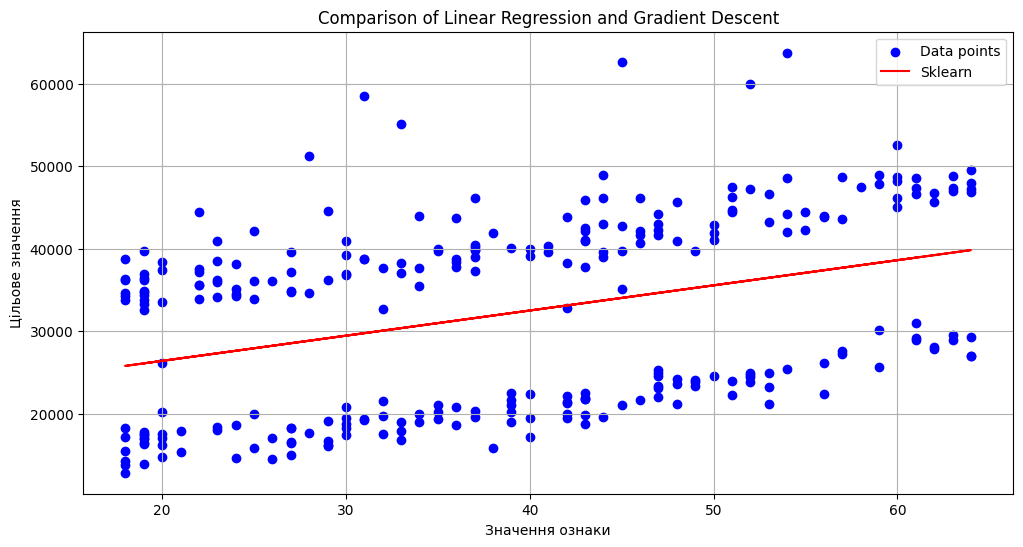

Точність моделі для курців: 10711.00334810241
Коефіцієнти для моделі курців: [305.23760211] 20294.128126915966


In [402]:
plt.figure(figsize=(12, 6))
plt.scatter(Xs, ys, color='blue', label='Data points')
plt.plot(Xs, predict_smok_sklearn, color='red', label='Sklearn')
plt.title('Comparison of Linear Regression and Gradient Descent')
plt.xlabel('Значення ознаки')
plt.ylabel('Цільове значення')
plt.legend()
plt.grid(True)
plt.show()

print('Точність моделі для курців:', loss_smok_sklearn)
print('Коефіцієнти для моделі курців:', lin_reg.coef_, lin_reg.intercept_)

Ця модель для набору даних курців, на мою думку, не підходить, оскільки charges за age для курців ідуть двома масивами точок рівнонапрямлених, з однаковим нахилом, проте на відстані близько 10000 доларів один від другого масивів точок. Наша модель зображає щось середнє між ними двома. Думаю, що є ще другий впливовий параметр на charges для курців окрім віку.

Для курців потрібна модель, яка за двома параметрами працює.